## Demo of Show Attend and tell : Image Caption Generation with Visual Attention 

# Students : LE BIHAN Eustache - SOULAIMANI Badr

The goal of the project is to generate captions for images. The model incorporates an encoder and a decoder as well as an attention mechanism. The encoder extracts the features from the image first. The decoder, based on those extracted features, generates a word at each time step. The job of the attention model is to provide the decoder with information about where to look in the image to generate the next word.

First, to use this notebook you have to download the pretrained model with its word map, and the script caption.py from the following link : https://github.com/Badr-22/DL-Image-Captioning-with-attention.git. Since the model is too big and can't be included in the repository, you can get it from this link: https://drive.google.com/drive/folders/189VY65I_n4RTpQnmLGj7IzVnOF6dmePC. You can also use your own pretrained model and word map.

In addition, to avoid any compatibility problem. The notebook was ran in a virtual environment with python 3.6, pytorch 1.10.2 and scipy 1.1.0 .

In this notebook, we will use the pretrained model to caption some images and we will also visualize how the attention mechanism works when captioning.

In [1]:
from caption import caption_image_beam_search, visualize_att
import torch
import json
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

C:\Anaconda\envs\DLProject\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# A case that works

In [2]:
model = './Test/BEST_checkpoint_coco_5_cap_per_img_5_min_word_freq.pth.tar' # Path of the pretrained model
word_map = './Test/WORDMAP_coco_5_cap_per_img_5_min_word_freq.json' # Path of the word map used by the model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model and word map
# Load model
checkpoint = torch.load(model, map_location=str(device))
decoder = checkpoint['decoder']
decoder = decoder.to(device)
decoder.eval()
encoder = checkpoint['encoder']
encoder = encoder.to(device)
encoder.eval()

# Load word map (word2ix)
with open(word_map, 'r') as j:
    word_map = json.load(j)
rev_word_map = {v: k for k, v in word_map.items()}  # ix2word


C:\Anaconda\envs\DLProject\lib\site-packages\torch\serialization.py:671: SourceChangeWarning: source code of class 'models.Encoder' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\Anaconda\envs\DLProject\lib\site-packages\torch\serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\Anaconda\envs\DLProject\lib\site-packages\torch\serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set 

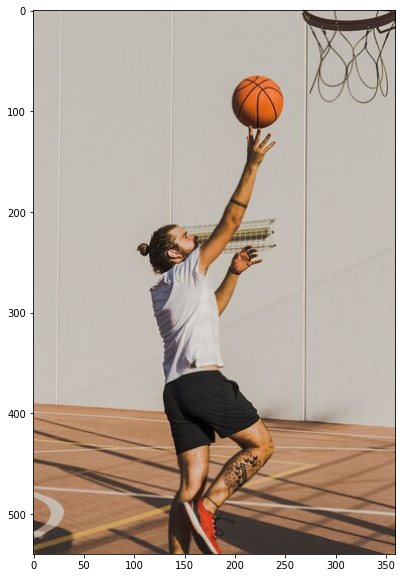

In [10]:
img = './Test/basketball.jpg' # Path of the image to caption
image=plt.imread(img)
figure(figsize=(15,10))
plt.imshow(image)

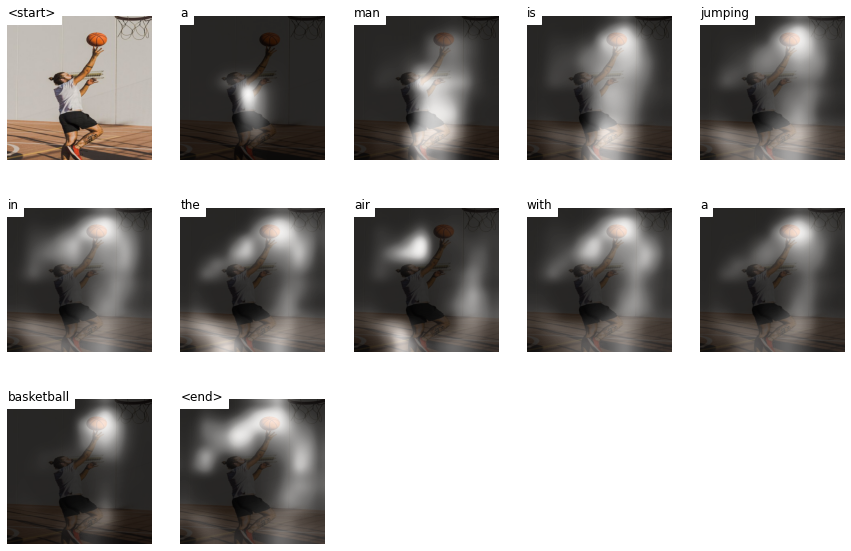

In [11]:
beam_size = 3 # Beam size for beam search

# Encode, decode with attention and beam search
seq, alphas = caption_image_beam_search(encoder, decoder, img, word_map, beam_size)
alphas = torch.FloatTensor(alphas)

# Visualize caption and attention of best sequence
figure(figsize=(15,10))
visualize_att(img, seq, alphas, rev_word_map)

We can see that in this example, the model captioned the image pretty well and managed to detect all the salient objects in it.

# Changing the beam search parameter

Beam search allows us to intellengitely pick the best sequence from a given number of sequences instead of choosing naively the best possible word at each time step. For example, let's say that the beam search parameter is set to 3. When we caption the image, we look first at the best 3 words in terms of score to start with. We then look for the next best 3 words for each previously chosen word and we keep the best 3 sequences overall. We keep iterating until the sequences are all finished and we take the one with the best score (additive score).

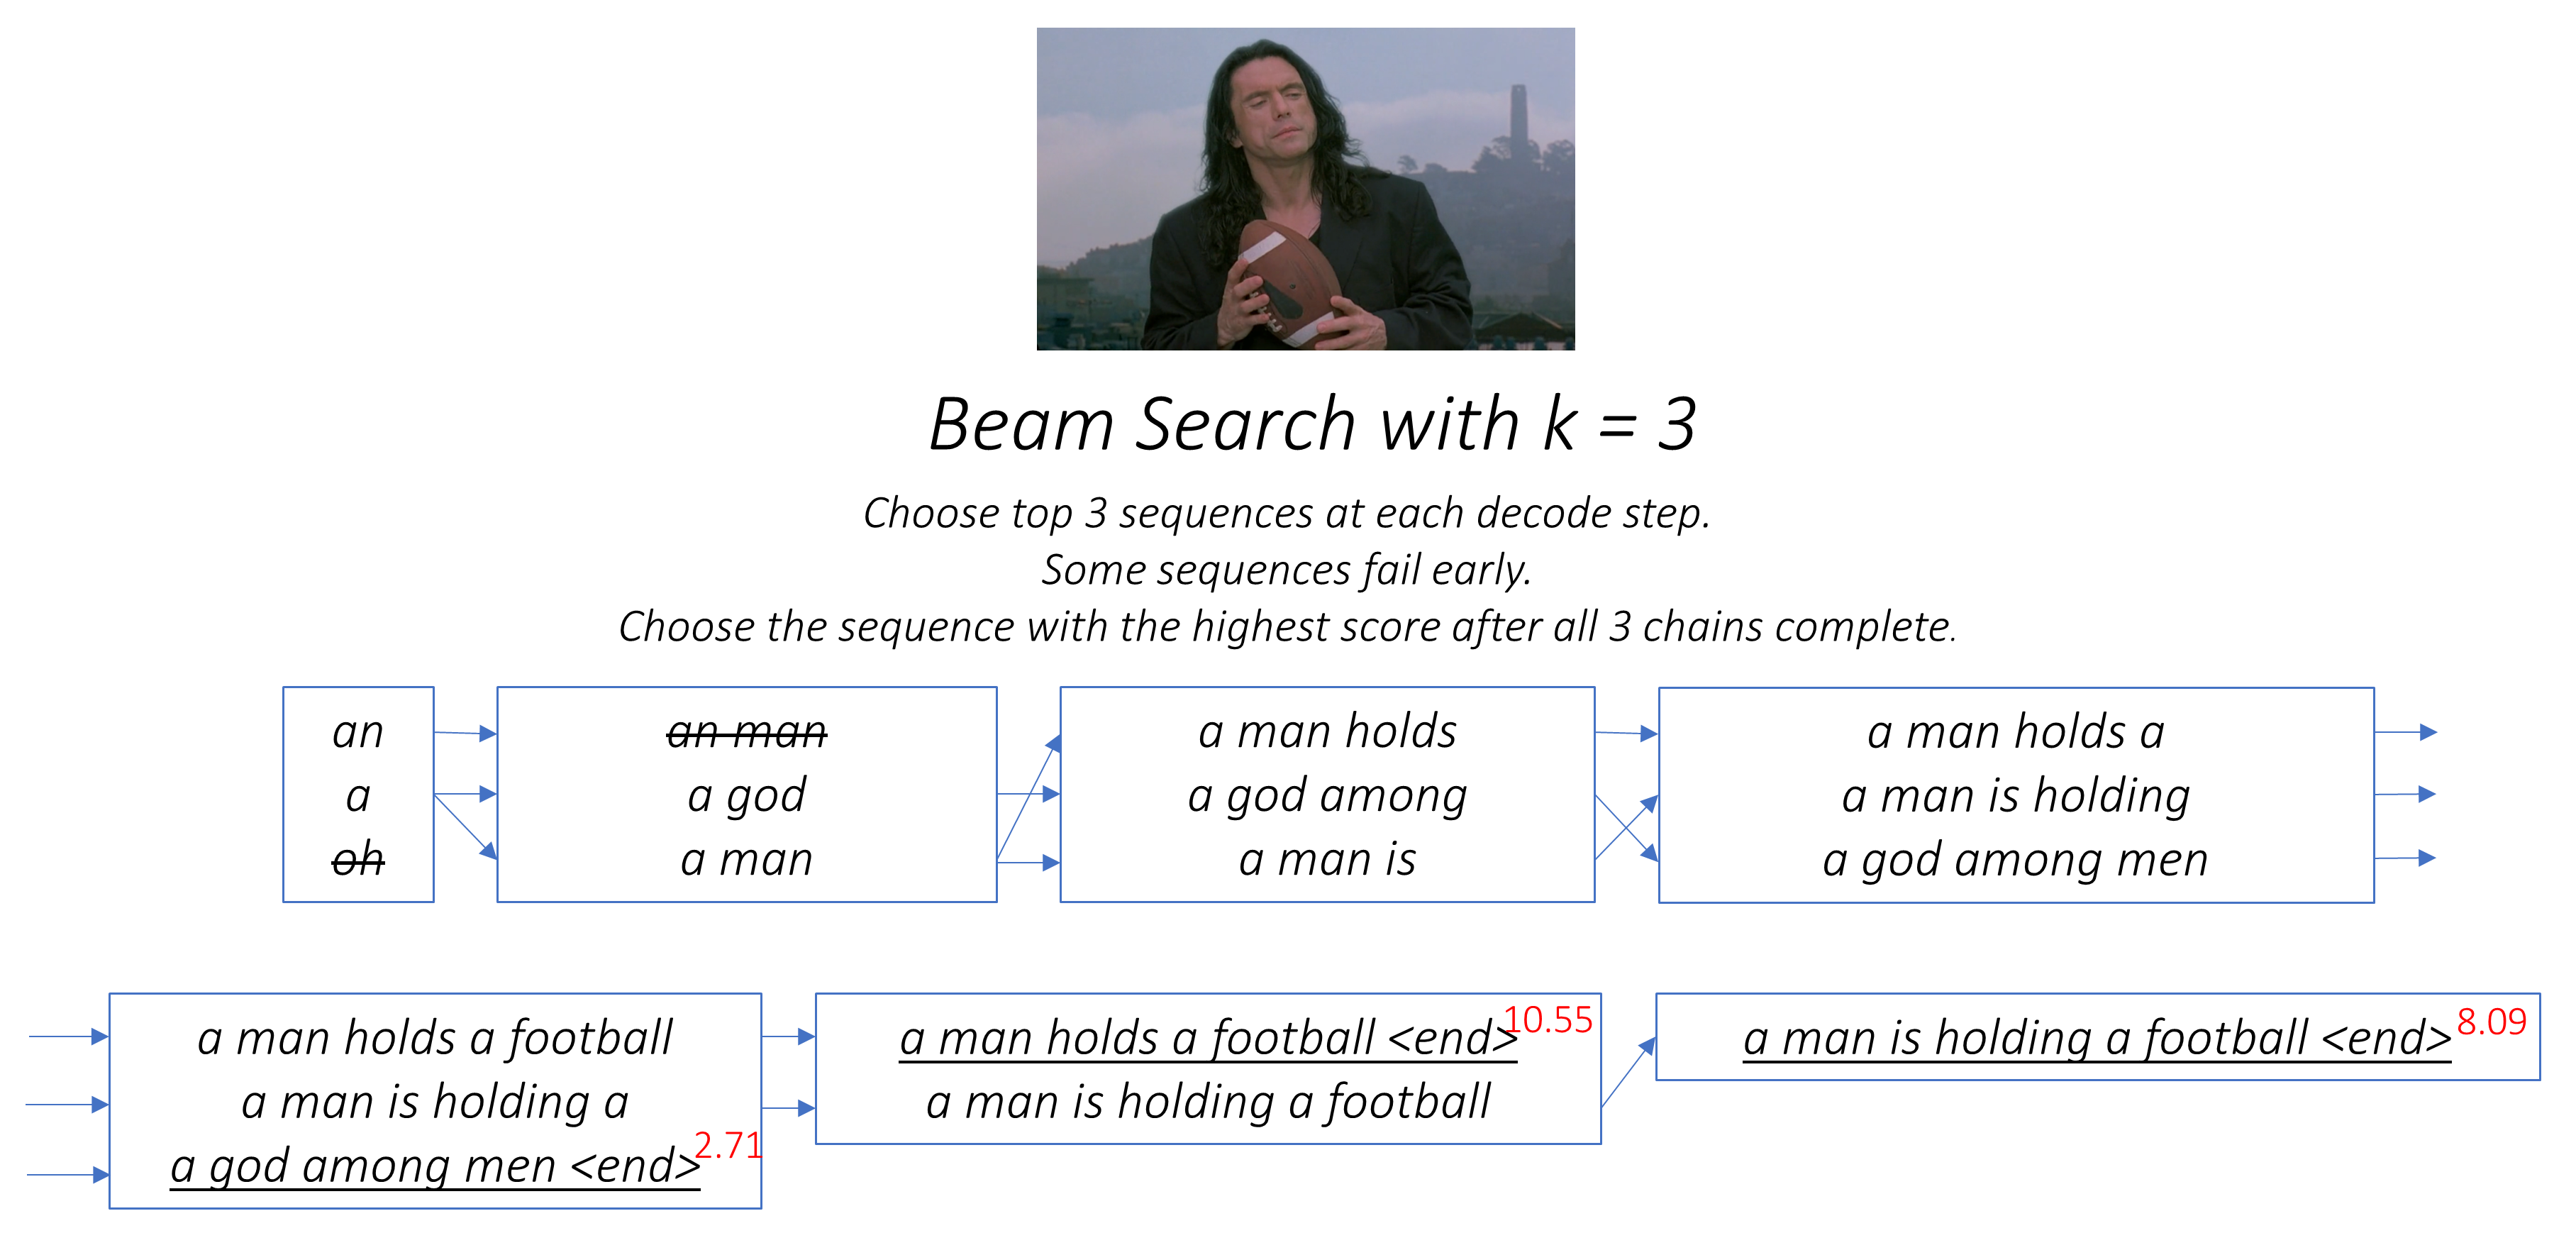

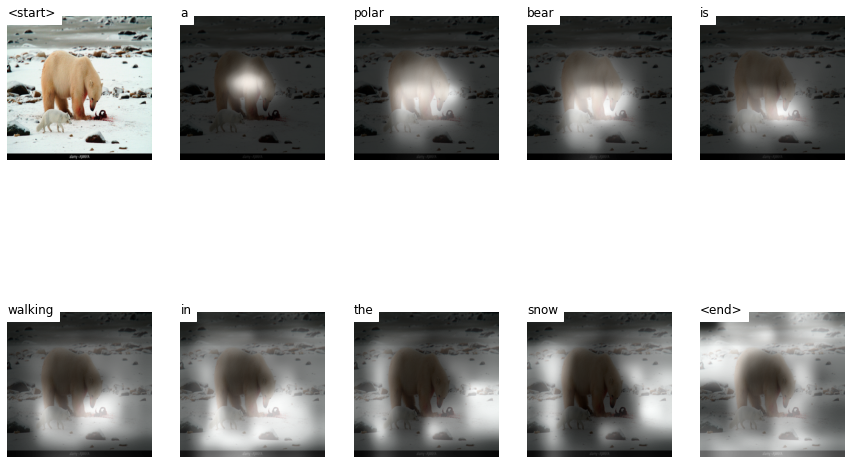

In [12]:
img = './Test/bear.jpg' # Path of the image to caption

# Encode, decode with attention and beam search
seq, alphas = caption_image_beam_search(encoder, decoder, img, word_map, beam_size=1)
alphas = torch.FloatTensor(alphas)

# Visualize caption and attention of best sequence
figure(figsize=(15,10))
visualize_att(img, seq, alphas, rev_word_map)

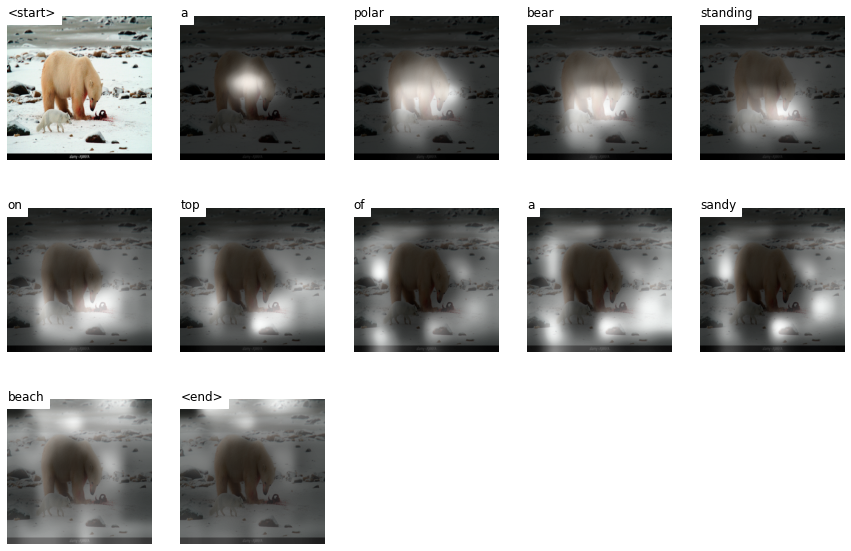

In [13]:
img = './Test/bear.jpg' # Path of the image to caption

# Encode, decode with attention and beam search
seq, alphas = caption_image_beam_search(encoder, decoder, img, word_map, beam_size=5)
alphas = torch.FloatTensor(alphas)

# Visualize caption and attention of best sequence
figure(figsize=(15,10))
visualize_att(img, seq, alphas, rev_word_map)

We found out throug testing the beam search doesnt always equate to better results. Sometimes it gives better results than the naive approach but also at other times like the example above it gives worse results. An explanation we could give to this is maybe that we allow words that are close in score to the correct ones and they end up in sequences with a higher overall score.

# A case that does not work very well

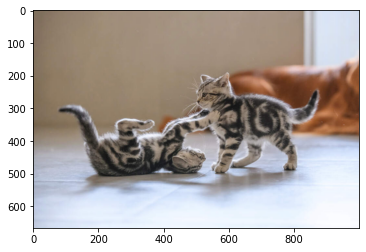

In [14]:
img = './Test/cats.jpg' # Path of the image to caption
image=plt.imread(img)
plt.imshow(image)

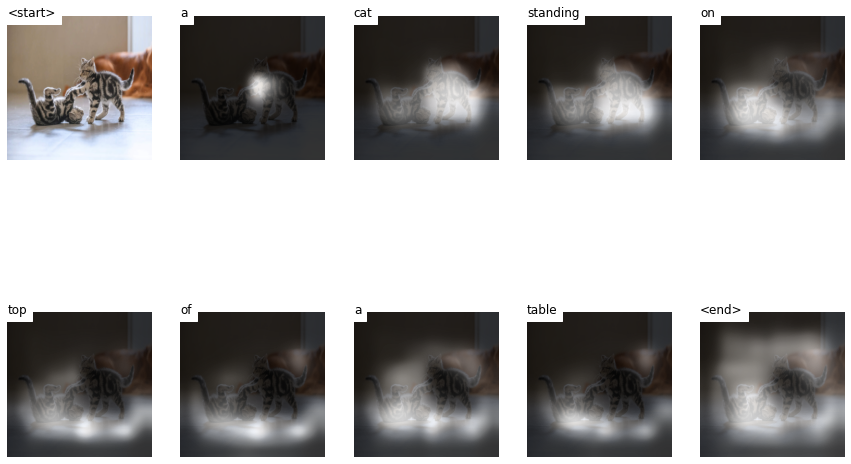

In [15]:

# Encode, decode with attention and beam search
seq, alphas = caption_image_beam_search(encoder, decoder, img, word_map, beam_size)
alphas = torch.FloatTensor(alphas)

# Visualize caption and attention of best sequence
figure(figsize=(15,10))
visualize_att(img, seq, alphas, rev_word_map)

In this case, we can see that the model only recognized one cat based on the caption it gave. And this is where the attention mechanism is useful because we can sort of see what the model sees when generating captions. Here, we can spot that the model recognized the standing cat but grouped the cat laying on the table with the table. Being able to see the parts the model focuses on and potentially explain its mistakes help massively both in explaining how the model works and to improve it.

# Give us an image and we will caption it

In [ ]:
img = './Test/cats.jpg' # Path of the image to caption
image=plt.imread(img)
figure(figsize=(15,10))
plt.imshow(image)

In [ ]:

# Encode, decode with attention and beam search
seq, alphas = caption_image_beam_search(encoder, decoder, img, word_map, beam_size)
alphas = torch.FloatTensor(alphas)

# Visualize caption and attention of best sequence
figure(figsize=(15,10))
visualize_att(img, seq, alphas, rev_word_map)